In [1]:
import sys
sys.path.append('../src')

from controller import Controller
from classic_pid_controller import ClassicPidController
from neural_pid_controller import NeuralPidController
from plant import Plant
from consys import ConSys

import matplotlib.pyplot as plt

In [2]:
def plot_classic_pid(mse_list, params_matrix):
    fig, axs = plt.subplots(2, 1, figsize=(10, 8))

    # Plot MSE
    axs[0].plot(mse_list)
    axs[0].set_title('Mean Squared Error')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('MSE')
    axs[0].set_xticks(range(len(mse_list)))

    # Plot parameters
    param_labels = ['kp','ki','kd']
    for i in range(params_matrix.shape[1]):
        axs[1].plot(params_matrix[:, i], label=param_labels[i])
    axs[1].set_title('Parameters')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Parameter Value')
    axs[1].legend()
    axs[1].set_xticks(range(params_matrix.shape[0]))

    plt.tight_layout()
    plt.show()

## Bathtub

### Classic PID controller

0.15863283 [0.1 0.3 0.1]
0.13450116 [0.12919715 0.32137385 0.1       ]
0.11653623 [0.15279187 0.34210616 0.1       ]
0.10340389 [0.17211723 0.3617184  0.1       ]
0.09390676 [0.18838044 0.37699348 0.1       ]
0.08776791 [0.2026108  0.38947815 0.1       ]
0.08168967 [0.2155908  0.39978158 0.1       ]
0.078178406 [0.22738196 0.40902996 0.1       ]
0.0736613 [0.23848553 0.41779113 0.1       ]
0.0701002 [0.2487514  0.42604044 0.1       ]


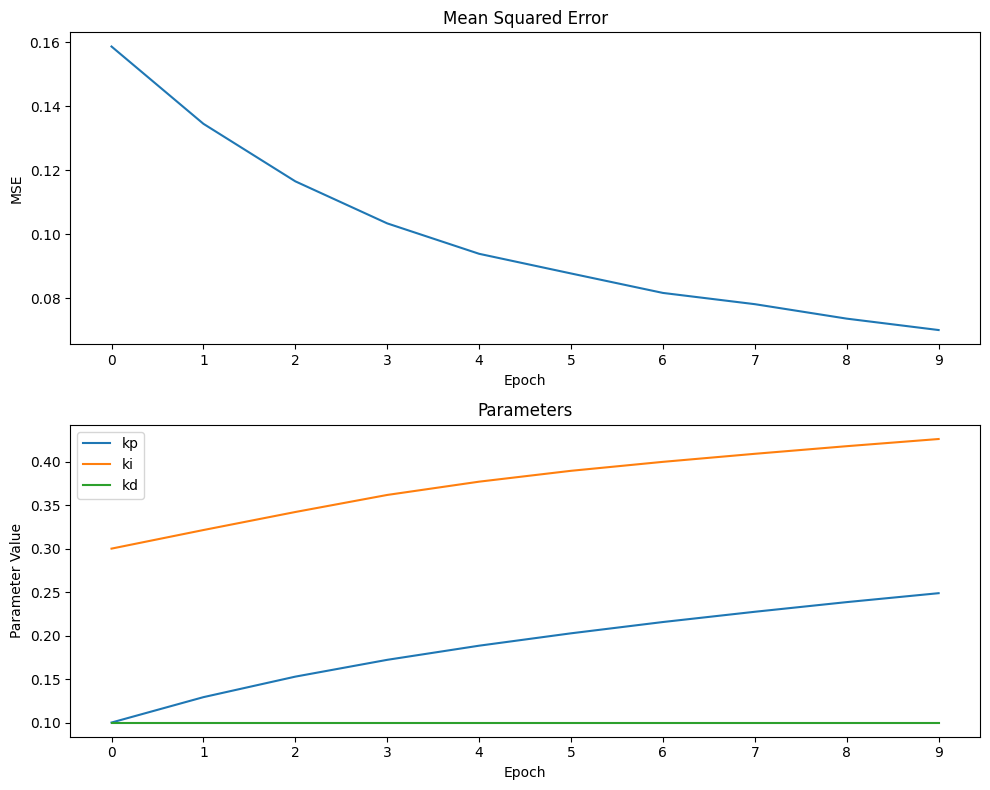

In [23]:
from bathtub import Bathtub

### Bathtub params:
A = 10      # cross-sectional area
C = A/100   # cross-sectional-drain area
H = 10      # initial height
g = 9.8     # gravitational constant

### ConSys params:
no_epochs = 10
timesteps_per_epoch = 100
learning_rate = 0.05
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
controller_params = [0.1, 0.3, 0.1]     # kp, ki, kd

controller = ClassicPidController()
plant = Bathtub(A, C, H, g)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list, params_matrix = consys.simulate(controller_params)

plot_classic_pid(mse_list, params_matrix)


## Cournot

### Classic PID controller

In [3]:
from cournot import CournotCompetition

### CournoutCompetition params:
T = 10      # Target profit per timestep
c_m = 0.1   # Marginal cost
q1 = 0.1    # initial quantity produced by 1
q2 = 0.2    # initial quantty produced by 2
p_max = 1   # maximum market price

### ConSys params:
no_epochs = 10
timesteps_per_epoch = 100
learning_rate = 0.05
min_noise_value = -0.01
max_noise_value = 0.01

### Controller params:
controller_params = [0.1, 0.3, 0.1]     # kp, ki, kd

controller = ClassicPidController()
plant = CournotCompetition(target_profit=T, marginal_unit_cost=c_m, own_quantity=q1, competitor_quantity=q2, maximum_price=p_max)
consys = ConSys(controller, plant, no_epochs, timesteps_per_epoch, learning_rate, min_noise_value, max_noise_value)
mse_list, params_matrix = consys.simulate(controller_params)

plot_classic_pid(mse_list, params_matrix)


nan [0.1 0.3 0.1]
nan [nan nan nan]
nan [nan nan nan]
nan [nan nan nan]
nan [nan nan nan]
nan [nan nan nan]
nan [nan nan nan]


KeyboardInterrupt: 